# Alternativa a wordclouds por grupo (ao longo do tempo, por região, etc)

Baseado em: [nytimes](http://archive.nytimes.com/www.nytimes.com/interactive/2011/06/10/education/commencement-speeches-graphic.html)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import math

In [2]:
def tokleanize(doc_list, stopwords):
    # tokenize docs
    doc_tokenized = [word_tokenize(doc) for doc in doc_list]
    # flatten to list of all tokens
    vocab_list = [y for x in doc_tokenized for y in x]
    # turn lowercase and remove anything that is not a word
    tokens_only_words = [word.lower() for word in vocab_list if word.isalpha()]
    # remove stopwords
    tokens_clean = [word for word in tokens_only_words if not word in stopwords]
    return tokens_clean

In [3]:
root_path = os.path.abspath('..')
data_path = os.path.join(root_path, 'notebooks')

In [4]:
tweets_filename = 'tweets_en_classification.csv'

In [5]:
tweets_path = os.path.join(data_path, tweets_filename)

In [6]:
tweets = pd.read_csv(tweets_path, index_col='Unnamed: 0').drop(columns='Unnamed: 0.1')

In [7]:
tweets = tweets.drop(columns=['hashtag', 'geo'])

In [8]:
map_dict = {'NEGATIVE': -1, 'POSITIVE': 1}

In [9]:
tweets.loc[:, 'classification'] = tweets.classification.map(map_dict)

In [10]:
tweets['date'] = pd.to_datetime(tweets['date'], errors= "coerce").dt.tz_localize(None)

In [11]:
tweets['weighted_classification'] = tweets.classification * tweets.score

In [12]:
months = [int(month) for month in sorted(tweets.date.dt.month.unique()[:-1]) if month < 7]

In [13]:
month_names = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
               'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

In [14]:
pt_stp_words = stopwords.words('portuguese')

In [23]:
custom_stp_words = ['portugal', 'vai', 'ser', 'q', 'agora', 'todos', 'pra', 'ter', 'dia', 'fazer',
                                 'tudo', 'sobre', 'ainda', 'hoje', 'vou', 'aqui', 'bem', 'ver', 'ir', 'brasil',
                                 'pode', 'porque', 'tá', 'n', 'assim', 'dias', 'vamos', 'nada', 'ficar', 'vão',
                                 'lá', 'merda', 'corona', 'estar', 'ano', 'anos', 'todo']
                    #, 'vírus', 'virus', 'coronavirus', 'coronavírus', 'covid', 'pandemia']

pt_stp_words.extend(custom_stp_words)

In [24]:
tokens_by_month = dict()
for month in months:
    df_month = tweets[tweets.date.dt.month == month]
    docs_month = df_month.text_clean.values.tolist()
    tokens_by_month[month] = tokleanize(docs_month, pt_stp_words)

In [25]:
count_by_month = {month: Counter(tokens) for month, tokens in tokens_by_month.items()}

In [26]:
most_common_month = {month: counter.most_common(10) for month, counter in count_by_month.items()}

In [27]:
count_all = count_by_month[1] + count_by_month[2] + count_by_month[3] + count_by_month[4] + count_by_month[5] + count_by_month[6]

In [28]:
count_all.most_common(15)

[('casa', 1035),
 ('pessoas', 1023),
 ('casos', 749),
 ('causa', 668),
 ('quarentena', 623),
 ('mundo', 610),
 ('saúde', 588),
 ('gente', 540),
 ('lisboa', 414),
 ('vida', 413),
 ('tempo', 410),
 ('país', 407),
 ('p', 376),
 ('quero', 371),
 ('apanhar', 363)]

In [29]:
most_common_month[1]

[('china', 24),
 ('porto', 17),
 ('casa', 13),
 ('mundo', 11),
 ('jogar', 10),
 ('chegou', 10),
 ('dizer', 9),
 ('braga', 9),
 ('caso', 9),
 ('medo', 9)]

In [30]:
all_most_common_words = list(set([tup[0] for counter in most_common_month.values() for tup in counter]))

In [31]:
all_most_common_words

['casa',
 'itália',
 'braga',
 'd',
 'jogar',
 'lisboa',
 'quero',
 'meio',
 'mortes',
 'china',
 'governo',
 'medo',
 'dizer',
 'casos',
 'abril',
 'europa',
 'pessoas',
 'rafa',
 'p',
 'porto',
 'saúde',
 'país',
 'chegou',
 'quarentena',
 'apanhar',
 'caso',
 'tempo',
 'causa',
 'ficaemcasa',
 'gente',
 'mundo']

In [32]:
most_common_all = [tup[0] for tup in count_all.most_common(15)]

In [33]:
most_common_all

['casa',
 'pessoas',
 'casos',
 'causa',
 'quarentena',
 'mundo',
 'saúde',
 'gente',
 'lisboa',
 'vida',
 'tempo',
 'país',
 'p',
 'quero',
 'apanhar']

In [34]:
n_words = 15

In [35]:
count_for_plot = dict()
for month, counter in count_by_month.items():
    count_for_plot[month] = dict()
    for word in most_common_all:
        count_for_plot[month][word] = counter[word]

In [36]:
count_list = list()
for dicty in count_for_plot.values():
    count_list.extend(list(dicty.values()))

In [37]:
most_common_month[1]

[('china', 24),
 ('porto', 17),
 ('casa', 13),
 ('mundo', 11),
 ('jogar', 10),
 ('chegou', 10),
 ('dizer', 9),
 ('braga', 9),
 ('caso', 9),
 ('medo', 9)]

In [38]:
word_list = list(range(1, n_words + 1)) * len(months)
month_list = list(range(1, len(months) + 1)) * n_words
marker_list = [(count/9)**2 for count in count_list]

[(-0.5, 8.0), (0.0, 16.0)]

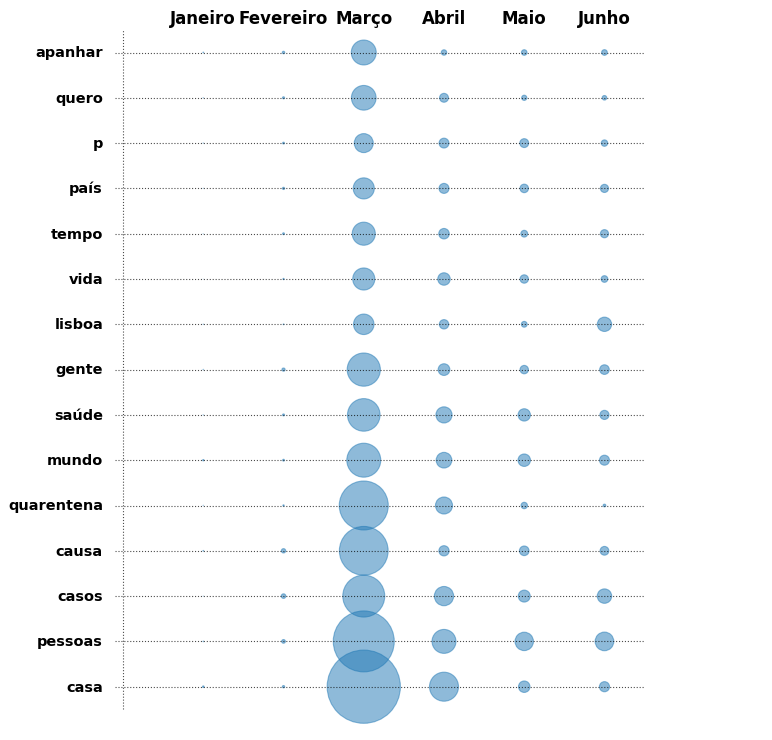

In [39]:
fig, ax = plt.subplots(1,1,figsize=(11,12), dpi= 80)

ax.scatter(sorted(month_list), word_list, marker_list, alpha=0.5)

plt.axis('off')

ax.vlines(x=0, ymin=0.5, ymax=n_words + 0.5, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

for month in months:
    ax.text(month, n_words + 0.75, month_names[month-1], horizontalalignment='center', verticalalignment='center', fontdict={'size':15, 'weight':700})
    #ax.vlines(x=month+0.5, ymin=0.5, ymax=21, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
        
for i, word in enumerate(most_common_all):
    ax.text(-0.25, i + 1, str(word), horizontalalignment='right', verticalalignment='center', fontdict={'size':13, 'weight':700})
    ax.hlines(y=i+1, xmin=-0.1, xmax=len(months) + 0.5, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

ax.set(xlim=(-0.5, len(months) + 2), ylim=(0, n_words + 1))

In [188]:
max(count_list)

593

In [150]:
pt_stp_words2 = stopwords.words('portuguese')
custom_stp_words2 = ['portugal', 'vai', 'ser', 'q', 'agora', 'todos', 'pra', 'ter', 'dia', 'fazer',
                    'tudo', 'sobre', 'ainda', 'hoje', 'vou', 'aqui', 'bem', 'ver', 'ir', 'brasil',
                    'pode', 'porque', 'tá', 'n', 'assim', 'dias', 'vamos', 'nada', 'ficar', 'vão',
                    'lá', 'merda', 'estar']

pt_stp_words2.extend(custom_stp_words2)

In [163]:
virus_related = [['vírus', 'virus'], 'corona', ['coronavírus', 'coronavirus'], 'covid', 'pandemia']

In [153]:
all_docs = tweets.text_clean.values.tolist()
all_tokens = tokleanize(all_docs, pt_stp_words2)
all_counter = Counter(all_tokens)

In [164]:
for word in virus_related:
    if type(word) is list:
        real_count = sum([all_counter[word_word] for word_word in word])
        print(word, real_count)
    else:
        print(word, all_counter[word])

virus 512
corona 6683
coronavírus 1374
covid 1275
pandemia 3105


In [165]:
covid_related_month = dict()
for month in months:
    df_month = tweets[tweets.date.dt.month == month]
    docs_covid_month = df_month.text_clean.values.tolist()
    covid_related_month[month] = tokleanize(docs_covid_month, pt_stp_words2)
counter_covid_month = {month: Counter(tokens) for month, tokens in covid_related_month.items()}

In [167]:
words_are_hard = dict()
for word in virus_related:
    words_are_hard[word] = list()
    for month in months:
        if type(word) is list:
            real_count = sum([counter_covid_month[month][word_word] for word_word in word])
            words_are_hard[word].append(real_count)
        else:
            words_are_hard[word].append(counter_covid_month[month][word])

In [168]:
words_are_hard

{'virus': [13, 66, 299, 56, 43, 35],
 'corona': [146, 478, 4138, 893, 523, 505],
 'coronavírus': [49, 150, 835, 199, 96, 45],
 'covid': [0, 4, 252, 327, 328, 364],
 'pandemia': [3, 17, 904, 883, 663, 635]}

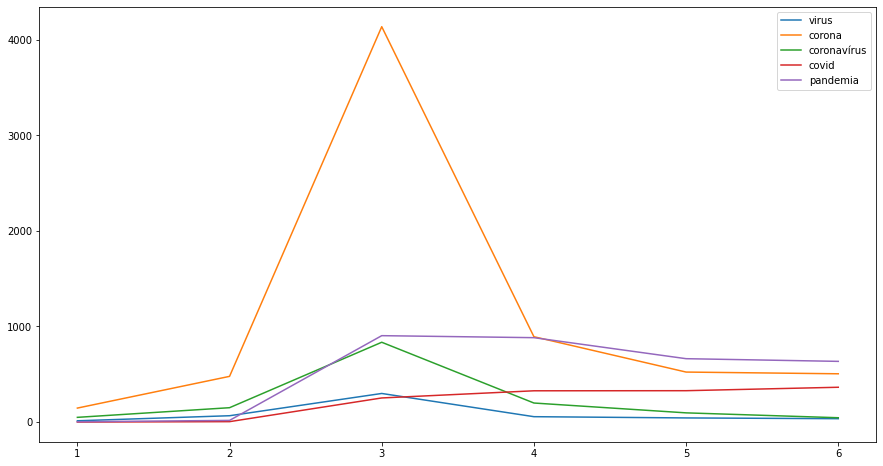

In [186]:
fig, ax = plt.subplots(figsize=(15, 8))
x = np.arange(1, len(months)+1)

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.15

for i, (word, values) in zip(x, words_are_hard.items()):
    # Note we add the `width` parameter now which sets the width of each bar.
    b1 = sns.lineplot(x, values, label=word)

plt.legend()